In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt
import requests

import re

In [45]:

df = pd.read_csv("../Input/stockdataset.csv", encoding = "latin-1")
df

FileNotFoundError: [Errno 2] No such file or directory: '../Input/stockdataset.csv'

In [3]:
len(df)

1939

In [4]:
df.isnull().sum().sort_values().tail()

fullTimeEmployees          569
forwardEps                 586
forwardPE                  588
financial_status          1305
revenueQuarterlyGrowth    1939
dtype: int64

In [5]:
display(df.head(),df.shape)

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,enterpriseToRevenue,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,4.987,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,0.796,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,1.175,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,5.108,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,7.849,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


(1939, 40)

In [6]:
df["Close"]= (df["ask"] + df["dayLow"])/2
df

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,Close
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.180000,85.785
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.100000,11.505
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.250000,138.970
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.820000,315.035
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.300000,29.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,ZIONN,Zions Bancorporation N.A. - Depositary Shares ...,Q,N,N,84133-1109,Financial Services,9879.0,Salt Lake City,UT,...,NaN,NaN,NaN,NaN,NaN,1.613270e+08,7.343870e+09,25.70,0.359000,25.650
1935,ZIONO,Zions Bancorporation N.A. - Depositary Shares ...,Q,N,N,84133-1109,Financial Services,9879.0,Salt Lake City,UT,...,NaN,NaN,NaN,NaN,NaN,1.613270e+08,7.464227e+09,27.39,0.394000,27.345
1936,ZNH,China Southern Airlines Company Limited Common...,N,N,NaN,510403,Industrials,103876.0,Guangzhou,NaN,...,0.07,NaN,41.000,122159.0,3.66,7.590681e+07,5.503053e+09,21.33,0.364589,21.165
1937,ZTR,Virtus Total Return Fund Inc.,N,N,NaN,06103,Financial Services,NaN,Hartford,CT,...,NaN,NaN,10.327,78756.0,NaN,NaN,5.729830e+08,8.34,0.113000,8.245


In [7]:
Nasdaq = df[["symbol","open","sector","dayLow","dayHigh","fiftyTwoWeekHigh"]]

Nasdaq 

,symbol,open,sector,dayLow,dayHigh,fiftyTwoWeekHigh
0,A,86.30,Healthcare,84.37,86.48,90.64
1,AAL,12.43,Industrials,11.07,12.55,34.99
2,AAP,137.50,Consumer Cyclical,136.31,141.78,171.43
3,AAPL,316.14,Technology,313.09,318.71,327.85
4,AAT,28.01,Real Estate,27.21,28.52,49.26
...,...,...,...,...,...,...
1934,ZIONN,25.70,Financial Services,25.60,25.70,26.57
1935,ZIONO,27.39,Financial Services,27.30,27.42,29.42
1936,ZNH,21.33,Industrials,21.00,21.33,36.43
1937,ZTR,8.34,Financial Services,8.10,8.42,11.96


In [8]:
Nasdaq.to_csv("../Nasdaq/tickersinfo.csv")

In [9]:
Nasdaq.isnull().sum().sort_values(ascending=False).head(20)

sector              13
fiftyTwoWeekHigh     0
dayHigh              0
dayLow               0
open                 0
symbol               0
dtype: int64

In [10]:
valid_columns = Nasdaq.isnull().sum().sort_values(ascending=False) == 0
valid_columns

sector              False
fiftyTwoWeekHigh     True
dayHigh              True
dayLow               True
open                 True
symbol               True
dtype: bool

In [11]:
valid_columns = [colName for colName,isValid in valid_columns.items() if isValid]

In [12]:
valid_columns

['fiftyTwoWeekHigh', 'dayHigh', 'dayLow', 'open', 'symbol']

In [13]:
valid_columns.append("sector")

In [14]:
Nasdaq.sector.value_counts()

Financial Services        879
Industrials               214
Real Estate               170
Energy                    121
Consumer Cyclical         108
Technology                107
Basic Materials            95
Consumer Defensive         69
Utilities                  68
Healthcare                 49
Communication Services     45
Financial                   1
Name: sector, dtype: int64

In [15]:
Nasdaq = Nasdaq.rename(columns={"symbol":"Ticker","open":"OpenPrice","sector":"Sector","dayLow":"Daylow","dayHigh":"Dayhigh","fiftyTwoWeekHigh":"52weekhigh"})
Nasdaq

,Ticker,OpenPrice,Sector,Daylow,Dayhigh,52weekhigh
0,A,86.30,Healthcare,84.37,86.48,90.64
1,AAL,12.43,Industrials,11.07,12.55,34.99
2,AAP,137.50,Consumer Cyclical,136.31,141.78,171.43
3,AAPL,316.14,Technology,313.09,318.71,327.85
4,AAT,28.01,Real Estate,27.21,28.52,49.26
...,...,...,...,...,...,...
1934,ZIONN,25.70,Financial Services,25.60,25.70,26.57
1935,ZIONO,27.39,Financial Services,27.30,27.42,29.42
1936,ZNH,21.33,Industrials,21.00,21.33,36.43
1937,ZTR,8.34,Financial Services,8.10,8.42,11.96


In [16]:

a = Nasdaq.loc[Nasdaq['Ticker'] == 'AAPL']
b=Nasdaq.loc[Nasdaq['Ticker'] == 'MSFT']



In [17]:
b

,Ticker,OpenPrice,Sector,Daylow,Dayhigh,52weekhigh
1203,MSFT,180.74,Technology,180.39,182.47,190.7


In [18]:
pd.set_option('display.max_rows', df.shape[0]+1)
print(Nasdaq)

     Ticker  OpenPrice                  Sector     Daylow    Dayhigh  \
0         A    86.3000              Healthcare    84.3700    86.4800   
1       AAL    12.4300             Industrials    11.0700    12.5500   
2       AAP   137.5000       Consumer Cyclical   136.3100   141.7800   
3      AAPL   316.1400              Technology   313.0900   318.7100   
4       AAT    28.0100             Real Estate    27.2100    28.5200   
5       ABB    19.6600             Industrials    19.3450    19.6900   
6      ABBV    90.5400              Healthcare    88.5600    91.0000   
7      ABEV     2.5000      Consumer Defensive     2.4200     2.5900   
8       ABM    34.3300             Industrials    32.7300    34.4400   
9       ABR     8.6900             Real Estate     8.1458     8.9500   
10      ABT    89.2800              Healthcare    88.1700    90.7800   
11     ABTX    27.3800      Financial Services    26.8400    28.1600   
12       AC    42.1100      Financial Services    41.9900    43.

In [19]:
Nasdaq.Sector.value_counts()

Financial Services        879
Industrials               214
Real Estate               170
Energy                    121
Consumer Cyclical         108
Technology                107
Basic Materials            95
Consumer Defensive         69
Utilities                  68
Healthcare                 49
Communication Services     45
Financial                   1
Name: Sector, dtype: int64

In [20]:
Nasdaq_ticker=Nasdaq.iloc[[3,100,1183,500,1172,1203,959,300,833,1215]]

In [21]:
Nasdaq_ticker

,Ticker,OpenPrice,Sector,Daylow,Dayhigh,52weekhigh
3,AAPL,316.14,Technology,313.0900,318.710,327.85
100,AOS,45.43,Industrials,45.3700,47.310,52.61
1183,MOS,13.13,Basic Materials,12.3550,13.150,25.71
500,DGX,112.15,Healthcare,115.4150,117.370,125.00
1172,MMLP,2.53,Energy,2.4726,2.531,7.26
1203,MSFT,180.74,Technology,180.3900,182.470,190.70
959,IRL,7.35,Financial Services,7.1842,7.350,10.08
300,BZM,13.12,Financial Services,13.1000,13.200,18.74
833,GSBC,43.93,Financial Services,42.5700,44.250,64.48
1215,MUR,13.04,Energy,12.6200,13.050,28.12


In [22]:
Nasdaq_ticker.columns

Index(['Ticker', 'OpenPrice', 'Sector', 'Daylow', 'Dayhigh', '52weekhigh'], dtype='object')

In [23]:
Nasdaq_ticker.to_csv("../Nasdaq/tickersinfo.csv")

In [24]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='token')
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('AAPL')
ts = TimeSeries(key='YOUR_API_KEY',rapidapi=True)


In [25]:
import request

response = requests.get("https://rapidapi.com/alphavantage/api/alpha-vantage?endpoint=apiendpoint_21c557b1-05af-40fc-b4a3-d4724d00a93c")
print(response.status_code)

200


# API KEY DATA

In [29]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='APIKEY', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='60min', outputsize='full')
pprint(data.head(5))


                      1. open  2. high  3. low  4. close  5. volume
date                                                               
2020-06-22 15:30:00  199.6900   200.76  199.63  200.5800  2858831.0
2020-06-22 14:30:00  199.9750   200.20  199.12  199.6686  3383702.0
2020-06-22 13:30:00  199.0400   200.00  198.93  199.9800  2451794.0
2020-06-22 12:30:00  199.5141   199.80  198.85  199.0470  2130916.0
2020-06-22 11:30:00  198.0300   199.80  197.78  199.5300  3924557.0


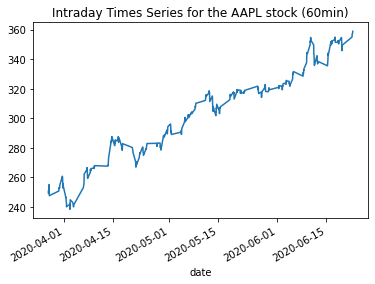

In [32]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='token', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AAPL',interval='60min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the AAPL stock (60min)')
plt.show()

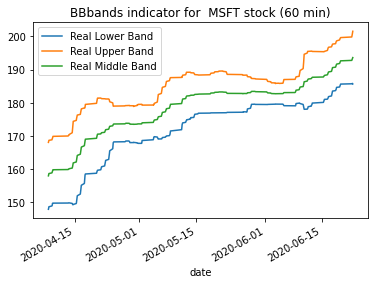

In [33]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='Token', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

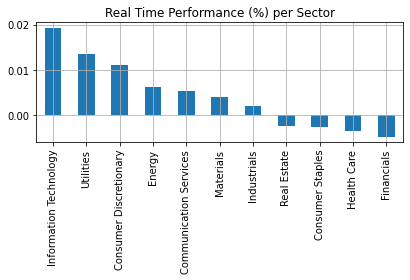

In [34]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key='token', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [36]:
url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"sector"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "6bece6952dmshfc8e884c923d5d3p121531jsn35fcd00b74b0"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"message":"Endpoint\/query does not exist"}


In [37]:
import asyncio
from alpha_vantage.async_support.timeseries import TimeSeries

symbols = ['AAPL', 'GOOG', 'TSLA', 'MSFT']


async def get_data(symbol):
    url ="https://rapidapi.com/alphavantage/api/alpha-vantage?endpoint=apiendpoint_21c557b1-05af-40fc-b4a3-d4724d00a93c"
    ts = TimeSeries(key="6bece6952dmshfc8e884c923d5d3p121531jsn35fcd00b74b0")
    data, _ = await ts.get_quote_endpoint(symbol)
    await ts.close()
    return data

tasks = [get_data(symbol) for symbol in symbols]
group1 = asyncio.gather(*tasks)


_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=ClientConnectorCertificateError(ConnectionKey(host='www.alphavantage.co', port=443, is_ssl=True, ssl=None, proxy=URL(''), proxy_auth=None, proxy_headers_hash=None), SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)'))>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/aiohttp/connector.py", line 936, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs)  # type: ignore  # noqa
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1050, in create_connection
    transport, protocol = await self._create_connection_transport(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1080, in _create_connection_tra

In [38]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-detail"

querystring = {"region":"US","lang":"en","symbol":"MSFT"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "6bece6952dmshfc8e884c923d5d3p121531jsn35fcd00b74b0"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"defaultKeyStatistics":{"annualHoldingsTurnover":{},"enterpriseToRevenue":{"raw":10.283,"fmt":"10.28"},"beta3Year":{},"profitMargins":{"raw":0.33356997,"fmt":"33.36%"},"enterpriseToEbitda":{"raw":22.254,"fmt":"22.25"},"52WeekChange":{"raw":0.4163884,"fmt":"41.64%"},"morningStarRiskRating":{},"forwardEps":{"raw":6.22,"fmt":"6.22"},"revenueQuarterlyGrowth":{},"sharesOutstanding":{"raw":7583439872,"fmt":"7.58B","longFmt":"7,583,439,872"},"fundInceptionDate":{},"annualReportExpenseRatio":{},"totalAssets":{},"bookValue":{"raw":15.086,"fmt":"15.09"},"sharesShort":{"raw":40829581,"fmt":"40.83M","longFmt":"40,829,581"},"sharesPercentSharesOut":{"raw":0.0054,"fmt":"0.54%"},"fundFamily":null,"lastFiscalYearEnd":{"raw":1561852800,"fmt":"2019-06-30"},"heldPercentInstitutions":{"raw":0.74093,"fmt":"74.09%"},"netIncomeToCommon":{"raw":46265999360,"fmt":"46.27B","longFmt":"46,265,999,360"},"trailingEps":{"raw":6.002,"fmt":"6.00"},"lastDividendValue":{},"SandP52WeekChange":{"raw":0.051739097,"fmt":"5

# Functions For Tecnical Analysis

In [44]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
from click._compat import raw_input
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
class TechnicalIndicators:
    def __init__(self):
        self.api_key= "b"
        self.macd_data=self.macd()
        self.bbands_data=self.bbands()
    def macd(self):
        a = TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data=a.get_macd(symbol=self.stock_name,interval='daily')
        return data
    def bbands (self):
        c=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data=c.get_bbands(symbol=self.stock_name)
        return data
   

In [41]:
import json
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-detail"
session = requests.session()
request = session.get(url, timeout=15)
stock_data = request.json()
print(stock_data)

{'message': 'Missing RapidAPI application key. Go to https://docs.rapidapi.com/docs/keys to learn how to get your API application key.'}


In [39]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
from click._compat import raw_input
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
class TechnicalIndicators:
    def __init__(self):
        self.api_key= "6bece6952dmshfc8e884c923d5d3p121531jsn35fcd00b74b0"
        self.stock_name=self.question()
        self.macd_data=self.macd()
        self.rsi_data=self.rsi()
        self.bbands_data=self.bbands()
        self.close_data=self.close()
        self.sma_data=self.sma()
    def question(self):
        stock_name=raw_input("APPL:")
        return stock_name
    def macd(self):
        a = TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data=a.get_macd(symbol=self.stock_name,interval='daily')
        return data
    def rsi(self):
        b=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data = b.get_rsi(symbol=self.stock_name,interval='daily',time_period=14)
        return data
    def bbands (self):
        c=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data=c.get_bbands(symbol=self.stock_name)
        return data
    def sma(self):
        d= TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data = d.get_sma(symbol=self.stock_name,time_period=30)
        return data
    def close(self):
        d=TimeSeries(key=self.api_key,output_format='pandas')
        data,meta_data=d.get_daily(symbol=self.stock_name,outputsize='full')
        return data

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x10f524820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x10f3bdb50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x1122c8b80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x112141e20>


In [40]:
  def question(self):
        stock_name=raw_input("Stock Name")
        return stock_name
question("")

Stock Nameamzn


'amzn'

In [42]:

def import_web(ticker):
    url = "https://rapidapi.com/alphavantage/api/alpha-vantage?endpoint=apiendpoint_21c557b1-05af-40fc-b4a3-d4724d00a93c"
    fp = urllib.request.urlopen(url)
    mybytes = fp.read()
    mystr = mybytes.decode("utf8")
    fp.close()
    return mystr

In [43]:
def get_value(ticker):
    js = import_web(ticker)
    parsed_data = json.loads(js) # loads the json and converts the json string into dictionary
    ps = parsed_data['Time Series (1min)']
    partitionSave(ps,ticker)

In [120]:
def main():
    #Start Process
    company_list = ['GOOGL','MSFT','ORCL','FB','AAPL','TSLA'];
    try:
        for company in company_list:
            print("Starting with " + company)
            get_value(company)
            print("Ended Writing Data of " + company)
    except Exception as e:
        print(e)

main()

Starting with GOOGL
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)>
